# Data Preprocessing and Analysis with Python 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import statsmodels.api as sm
import statsmodels.formula.api as smf


In [3]:
np.version.version

'1.23.5'

## Data preprocessing and plots

In [8]:
#Load the Data

df= pd.read_csv ('players_21.csv')

df['value'] = df ['value_eur']/1000000

df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,value
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,67.500
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,46.000
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,75.000
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,80.000
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,90.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679,https://sofifa.com/player/256679/kevin-angulo/...,K. Angulo,Kevin Angulo,24,1996-04-13,176,73,Colombia,América de Cali,...,47+2,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2,0.040
18940,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,Mengxuan Zhang,21,1999-04-26,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,...,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2,0.035
18941,250989,https://sofifa.com/player/250989/zhenghao-wang...,Wang Zhenghao,王政豪,20,2000-06-28,185,74,China PR,Tianjin TEDA FC,...,42+2,42+2,42+2,42+2,44+2,47+2,47+2,47+2,44+2,0.035
18942,257697,https://sofifa.com/player/257697/zitong-chen/2...,Chen Zitong,Zitong Chen,23,1997-02-20,186,80,China PR,Shijiazhuang Ever Bright F.C.,...,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2,0.040


In [12]:
# Displaying the most valuable player for each position

valuable_player = df [["team_position", "player_positions", "short_name", "value"]].groupby("team_position").max()

#gb = df.groupby("team_position").max()

valuable_player


,player_positions,short_name,value
team_position,,,
CAM,"ST, RW, LW",Álex Fernández,67.5
CB,"RB, LB",Yuan Mincheng,33.0
CDM,"CM, CDM, CAM",Zhou Dingyang,59.5
CF,"ST, CF, CAM",V. Figueroa,53.0
CM,"RM, CM",Zhang Gong,16.5
GK,GK,Álvaro Vallés,75.0
LAM,"ST, RM",Zang Yifeng,20.5
LB,"RB, RWB, CB",Ángel Martínez,53.0
LCB,"RB, RWB",�. Radu,75.5


In [10]:
# Displaying 10 most valuable Clubs

df_teams= df[["club_name", "value", "dob"]].groupby("club_name").sum().sort_values(by=["value"], ascending = False).head(10)


#df_teams = df.drop_duplicates(subset=['Age']).sort_values(by=['Age'])

df_teams


,value
club_name,
Liverpool,840.625
Real Madrid,760.850
Manchester City,747.275
FC Barcelona,722.200
FC Bayern München,609.700
Paris Saint-Germain,605.675
Chelsea,602.275
Atlético Madrid,582.500
Tottenham Hotspur,571.525


In [13]:
size = df[["club_name", "sofifa_id", "dob", "player_url"]].groupby("club_name").count()

size

,sofifa_id,dob,player_url
club_name,,,
1. FC Heidenheim 1846,30,30,30
1. FC Kaiserslautern,28,28,28
1. FC Köln,30,30,30
1. FC Magdeburg,27,27,27
1. FC Nürnberg,30,30,30
...,...,...,...
Zamora FC,28,28,28
Çaykur Rizespor,30,30,30
Örebro SK,26,26,26


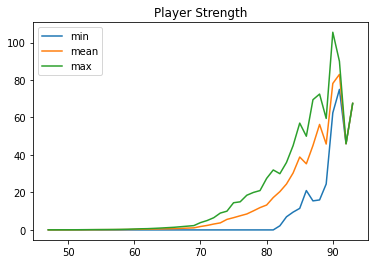

In [14]:
#df_most_valuable=df.drop_duplicates(subset=['power_strength']).sort_values(by=['power_strength'])

#df_2=df.sort_values('power_strength').groupby('power_strength').median()
#df_3=df.sort_values('power_strength').groupby('power_strength').mean()
#df_4=df.sort_values('power_strength').groupby('power_strength').max()

#plt.plot(df_2['value_eur'])
#plt.plot(df_3['value_eur'])
#plt.plot(df_4['value_eur'])

# Displaying the minium, the mean and the maximum value for each overall player strength group.

plt.plot(df[["overall", "value"]].groupby('overall').min()["value"], label = 'min')

plt.plot(df[["overall", "value"]].groupby('overall').mean()["value"], label = 'mean')

plt.plot(df[["overall", "value"]].groupby('overall').max()["value"], label = 'max')



#plt.plot(minimum['value'], label= 'min')

#plt.plot(mean['value'], label = 'mean')

#plt.plot(maximum['value'], label = 'max')

plt.legend()

plt.title('Player Strength')
plt.savefig('overall.pdf')

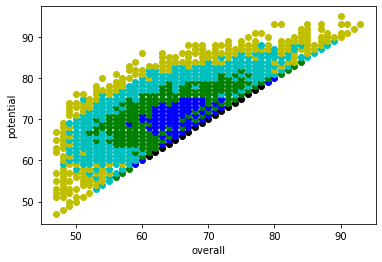

In [21]:
#Create a matrix filled with zeros and dimension 100x100


mat = np.zeros((100, 100))


for ov,pot in zip(df['overall'],df['potential']):
    
    # Increase the value in the matrix in ov row and the pot column by 1
    
    mat[ov, pot] +=1

colors=[('w',0),('y',1),('c',5),('g',20),('b',50),('k',100)]

#print (colors)
# Iterate over ov grid
for ov in range (100):
        

    # Iterate over pot grid
    for pot in range (100):
    
        # Ignore all iterations where the count is zero
        if (mat[ov, pot] != 0):  
        
            dot_color = [color for color,value in colors if value<=mat[ov,pot]][-1]
            #Data points are fully mixed in their own chunk and reducing them will not be a good solution as we can
            #see from the output that they will still be mixed.
            
            # Plot a dot with ov as x,pot as y and dot_color as color
            
            
            plt.scatter(x = ov, y = pot, c = dot_color)
            

#Add the x and y label
plt.xlabel('overall')
plt.ylabel('potential')

#Save the figure
plt.savefig('overall.pdf')

## Regression Analysis

In [16]:
# Deleting all players where the value is zero.

#df = pd.DataFrame({'value':[0,0,1,1]})


df = df[df["value_eur"] != 0]

#value_zero = df.loc[(df!=0).any(axis=1)]

df
 


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,value
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,67.500
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,46.000
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,75.000
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,80.000
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,90.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679,https://sofifa.com/player/256679/kevin-angulo/...,K. Angulo,Kevin Angulo,24,1996-04-13,176,73,Colombia,América de Cali,...,47+2,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2,0.040
18940,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,Mengxuan Zhang,21,1999-04-26,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,...,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2,0.035
18941,250989,https://sofifa.com/player/250989/zhenghao-wang...,Wang Zhenghao,王政豪,20,2000-06-28,185,74,China PR,Tianjin TEDA FC,...,42+2,42+2,42+2,42+2,44+2,47+2,47+2,47+2,44+2,0.035
18942,257697,https://sofifa.com/player/257697/zitong-chen/2...,Chen Zitong,Zitong Chen,23,1997-02-20,186,80,China PR,Shijiazhuang Ever Bright F.C.,...,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2,0.040


In [23]:
# Determining the most overvalued (highest residual value) player by Regressing the logarithmic player value on the 
#overall strength and potential of the player

df['y_log'] = np.log(df['value_eur'])



#res=smf.ols('value_eur ~ overall + potential',data=df).fit()

res1 = smf.ols('y_log ~ overall + potential',data = df[df["value_eur"] != 0]).fit()

print(res1.summary())


df['pred'] = res1.predict()

df['residuals'] = (df['y_log']- df['pred'])

#residuals

df.sort_values('residuals', ascending=False).head(10)


#df['pred']
#res1.predict()

# X_true = np.array([100, 200, 300, 400, 500])
# y_pred = np.array([200, 100, 100, 100, 100])

# # compute residuals in their absolute values
# residuals = map(abs, y_true - y_pred)



#error = abs(y_pred - y_test)
#max_error = np.argmax(difference)
#max_errors = np.argsort(difference)[-10:]

# X_test[max_error]
# X_test[max_errors]

#residuals


#print(res1.summary())

#res=smf.ols('np.log(overall) ~ Age + Goals + C(Potential)',data=df).fit()

                            OLS Regression Results                            
Dep. Variable:                  y_log   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                 1.628e+05
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:19:58   Log-Likelihood:                -5464.8
No. Observations:               18707   AIC:                         1.094e+04
Df Residuals:                   18704   BIC:                         1.096e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0877      0.028    -38.406      0.0

C:\Users\Ornab\AppData\Local\Temp/ipykernel_11840/1202356460.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_log'] = np.log(df['value_eur'])
C:\Users\Ornab\AppData\Local\Temp/ipykernel_11840/1202356460.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pred'] = res1.predict()
C:\Users\Ornab\AppData\Local\Temp/ipykernel_11840/1202356460.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,rwb,lb,lcb,cb,rcb,rb,value,y_log,pred,residuals
18942,257697,https://sofifa.com/player/257697/zitong-chen/2...,Chen Zitong,Zitong Chen,23,1997-02-20,186,80,China PR,Shijiazhuang Ever Bright F.C.,...,47+2,47+2,49+2,49+2,49+2,47+2,0.040,10.596635,9.398041,1.198594
18943,257936,https://sofifa.com/player/257936/yue-song/210002,Song Yue,Yue Song,28,1991-11-20,185,79,China PR,Tianjin TEDA FC,...,47+0,47+0,46+1,46+1,46+1,47+0,0.030,10.308953,9.131113,1.177840
18939,256679,https://sofifa.com/player/256679/kevin-angulo/...,K. Angulo,Kevin Angulo,24,1996-04-13,176,73,Colombia,América de Cali,...,47+2,47+2,46+2,46+2,46+2,47+2,0.040,10.596635,9.464773,1.131862
18938,257933,https://sofifa.com/player/257933/wenzhuo-huang...,Huang Wenzhou,Wenzhuo Huang,21,1999-01-07,174,68,China PR,Shanghai SIPG FC,...,47+2,47+2,46+2,46+2,46+2,47+2,0.040,10.596635,9.531505,1.065130
18941,250989,https://sofifa.com/player/250989/zhenghao-wang...,Wang Zhenghao,王政豪,20,2000-06-28,185,74,China PR,Tianjin TEDA FC,...,42+2,44+2,47+2,47+2,47+2,44+2,0.035,10.463103,9.398041,1.065063
18936,255626,https://sofifa.com/player/255626/jiyu-zhong/21...,Zhong Jiyu,Jiyu Zhong,23,1997-01-05,170,62,China PR,Shijiazhuang Ever Bright F.C.,...,46+2,46+2,43+2,43+2,43+2,46+2,0.045,10.714418,9.664969,1.049449
18934,257523,https://sofifa.com/player/257523/zhenao-wang/2...,Wang Zhen'ao,Zhen'ao Wang,20,1999-08-10,175,69,China PR,Dalian YiFang FC,...,40+2,39+2,35+2,35+2,35+2,39+2,0.050,10.819778,9.798433,1.021346
18940,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,Mengxuan Zhang,21,1999-04-26,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,...,42+2,45+2,47+2,47+2,47+2,45+2,0.035,10.463103,9.464773,0.998331
18935,247223,https://sofifa.com/player/247223/ao-xia/210002,Xia Ao,夏奥,21,1999-02-11,178,66,China PR,Wuhan Zall,...,44+2,46+2,47+2,47+2,47+2,46+2,0.040,10.596635,9.664969,0.931666
18937,257689,https://sofifa.com/player/257689/huapeng-wang/...,Wang Huapeng,Huapeng Wang,20,1999-08-05,181,77,China PR,Guangzhou R&F FC,...,42+2,45+2,47+2,47+2,47+2,45+2,0.035,10.463103,9.531505,0.931599


In [19]:
res1.predict()

array([19.13250561, 18.91508403, 18.83112643, ...,  9.39804066,
        9.39804066,  9.13111268])

In [20]:
df['potential']

0        93
1        92
2        93
3        91
4        91
         ..
18939    52
18940    52
18941    51
18942    51
18943    47
Name: potential, Length: 18707, dtype: int64